## Gradient Boosting Algorithms

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
SEED = 23 # it just generate random number

In [4]:
X,y = load_digits(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.23,random_state=SEED)

In [5]:
gcb = GradientBoostingClassifier(n_estimators=300,learning_rate=0.001,random_state=100,max_features=5)
gcb

GradientBoostingClassifier(learning_rate=0.001, max_features=5,
                           n_estimators=300, random_state=100)

In [6]:
gcb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_features=5,
                           n_estimators=300, random_state=100)

In [7]:
y_pred = gcb.predict(X_test)

In [8]:
acc = accuracy_score(y_test,y_pred)
acc*100

92.9951690821256

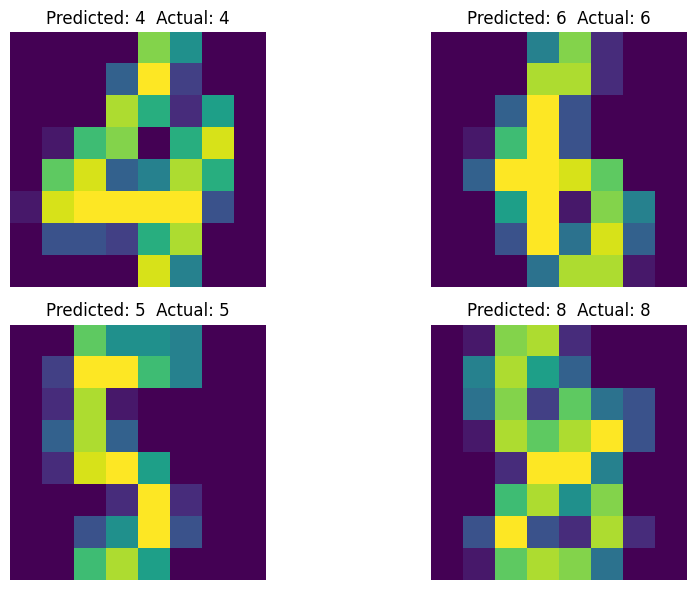

In [10]:
plt.figure(figsize=(10, 6))
for i in range(4):
    # Reshape the image data (assuming 8x8 digits)
    image = X_test[i].reshape(8, 8)
    plt.subplot(2, 2, i+1)
    plt.imshow(image, cmap='viridis')
    plt.title(f"Predicted: {y_pred[i]}  Actual: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
parameter = {
    'loss': ['log_loss', 'exponential'],  # Loss function
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'n_estimators': [100, 200, 500],  # Number of boosting stages
    'subsample': [1.0, 0.8, 0.5],  # Subsample ratio for each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required for a split
    # 'min_samples_leaf': [1, 3, 5],  # Minimum samples required at each leaf node
    # 'max_depth': [3, 5, 8],  # Maximum depth of individual decision trees
    # 'init': [None],  # Initial predictor (optional)
    # 'ccp_alpha': [0.0, 0.1, 1.0],  # Complexity parameter for alpha pruning (optional)
    # 'random_state': [None],  # Seed for random number generation (optional)
    # 'verbose': [0],  # Level of verbosity (0-silent, 1-print messages)
    # 'max_features': ['sqrt', 'log2'],  # Feature selection strategy
    # 'warm_start': [False],  # Use previously fitted trees (requires persistence)
    # 'validation_fraction': [0.1],  # Fraction of training data for validation (optional)
    # 'tol': [0.0001],  # Tolerance for stopping procedure
}

In [11]:
cv = GridSearchCV(gcb,param_grid=parameter,cv=5,scoring='accuracy')
cv

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.001,
                                                  max_features=5,
                                                  n_estimators=300,
                                                  random_state=100),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['log_loss', 'exponential'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [1.0, 0.8, 0.5]},
             scoring='accuracy')

In [12]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.001,
                                                  max_features=5,
                                                  n_estimators=300,
                                                  random_state=100),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['log_loss', 'exponential'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [1.0, 0.8, 0.5]},
             scoring='accuracy')

In [15]:
cv.best_params_

{'learning_rate': 0.1,
 'loss': 'log_loss',
 'min_samples_split': 5,
 'n_estimators': 500,
 'subsample': 1.0}

In [16]:
y_pred = cv.predict(X_test)

In [17]:
acc = accuracy_score(y_test,y_pred)
acc*100

98.30917874396135

## Extreme Gradient Boosting Machine (XGBM)

In [9]:
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [10]:
n=50
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
}

In [11]:
xgm_train = xgb.DMatrix(X_train,y_train,enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [12]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBClassifier(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Accuracy score',accuracy_score(y_test,y_pred)*100)

Accuracy score 96.1352657004831


In [13]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 1383, number of used features: 53
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score -2.248404
[LightGBM] [Info] Start training from score -2.297536
[LightGBM] [Info] Start training from score -2.326736
[LightGBM] [Info] Start training from score -2.248404
[LightGBM] [Info] Start training from score

LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=42)

In [14]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training accuracy 1.0000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Testing accuracy 0.9807


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

<Figure size 2500x1000 with 0 Axes>

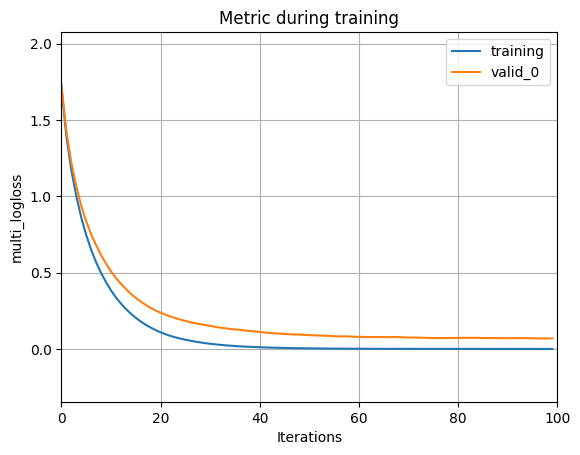

In [15]:
plt.figure(figsize=(25,10))
lgb.plot_metric(model)

ImportError: You must install graphviz and restart your session to plot tree.

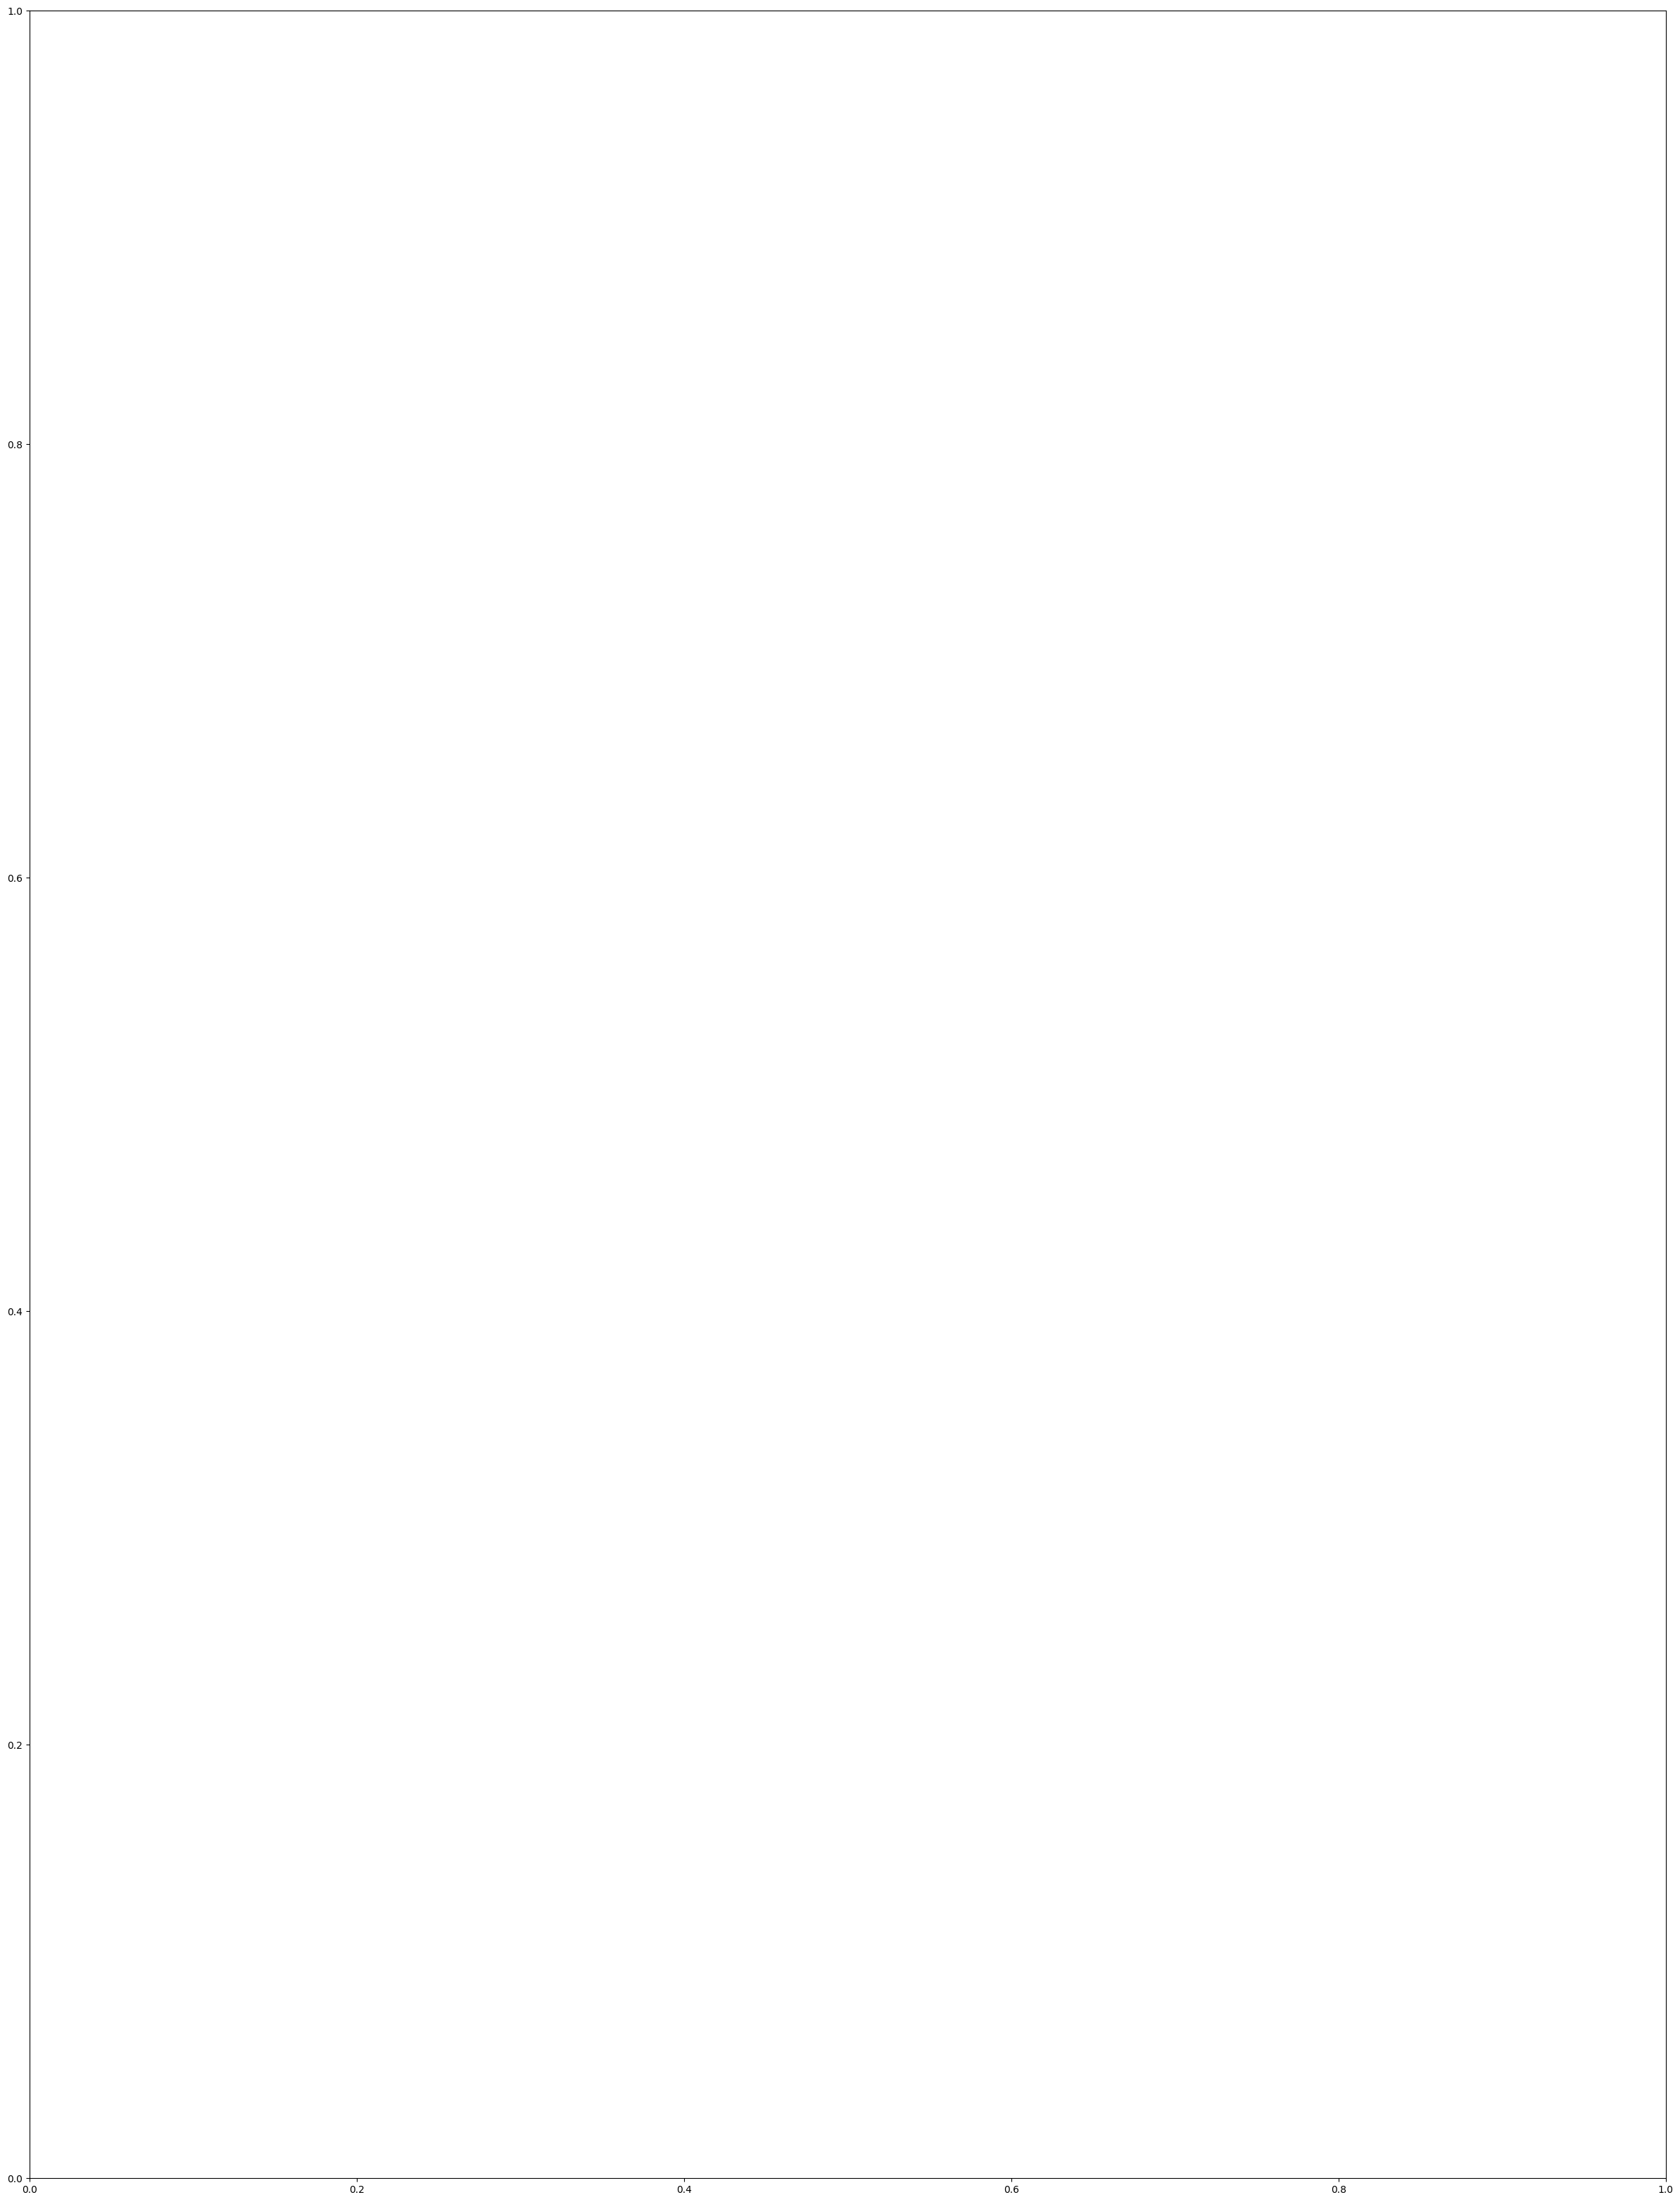

In [18]:
lgb.plot_tree(model,figsize=(30,40))

In [17]:
try:
  import graphviz
  print("Graphviz is installed!")
except ImportError:
  print("Graphviz is not installed.")

Graphviz is not installed.


In [38]:
met.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

AttributeError: module 'lightgbm' has no attribute 'plot_confusion_matrix'